In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [2]:
# стаж преподавателя, стоимость урока
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

# полученный балл ЕГЭ
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
def normal_scale(X):
    min_X = X.min()
    max_X = X.max()
    return (X - min_X) / (max_X - min_X)

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
# стандартизируем 2-й и 3-й признаки с изменением типа на float
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-0.13203404 -1.36723371 -1.64228204  1.90041977], error 3653.662315710956
Iter: 500, weights: [21.90318095  5.07146893 -7.40437443 19.93772534], error 42.106640556042564
Iter: 1000, weights: [26.68659019  5.91842007 -6.29562166 17.2293974 ], error 34.877016732599536
Iter: 1500, weights: [29.98154172  6.02365163 -5.04807055 15.3482233 ], error 31.088352962970824
Iter: 2000, weights: [32.33450808  6.04905975 -4.10685323 14.00323061], error 28.93094811771305
Iter: 2500, weights: [34.02345656  6.06230696 -3.4262023  13.03763822], error 27.66751860521171
Iter: 3000, weights: [35.23664552  6.07132439 -2.93677974 12.34402708], error 26.907336761449937
Iter: 3500, weights: [36.10817833  6.07775266 -2.58513722 11.84574787], error 26.437292701413064
Iter: 4000, weights: [36.73428027  6.08236571 -2.33251514 11.48778807], error 26.138869204786573
Iter: 4500, weights: [37.18406756  6.08567921 -2.15103269 11.2306322 ], error 25.94474145298272
Final MSE: 25.81573611048963


In [9]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

reg (lambda)=0.0
Iter: 0, weights: [2.41792607 0.80575537 0.53638568 2.4438025 ], error 3095.2108683990896
Iter: 500, weights: [23.66294366  5.24542652 -6.90234656 18.97992458], error 39.248248365526536
Iter: 1000, weights: [28.36771852  6.10461795 -5.83829245 16.31697234], error 32.88078692115358
Iter: 1500, weights: [31.76997996  6.2161548  -4.55302315 14.37462609], error 29.45197615930501
Iter: 2000, weights: [34.32369728  6.24403607 -3.53181181 12.91489095], error 27.498412800166534
Iter: 2500, weights: [36.25072924  6.25918292 -2.7552452  11.81318439], error 26.384122185250913
Iter: 3000, weights: [37.70594439  6.27000269 -2.16818829 10.9812008 ], error 25.74852957329967
Iter: 3500, weights: [38.80497621  6.27810931 -1.72475576 10.35285418], error 25.38598668592672
Iter: 4000, weights: [39.63501719  6.284225   -1.38984759  9.87829678], error 25.179191729895802
Iter: 4500, weights: [40.26190479  6.28884317 -1.13690781  9.51988776], error 25.061235605707683
Final MSE: 24.99395327203

Iter: 2500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 3000, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 3500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4000, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Final MSE: 2289.371282218247
reg (lambda)=0.45
Iter: 0, weights: [ 0.76869488  0.06912609 -0.07788092  2.11961634], error 3450.5212598147978
Iter: 500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.870216381053
Iter: 1000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.870216381053
Iter: 1500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.870216381053
Iter: 2000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.870216381053
Iter: 2500, weights: [2.12472722

Iter: 500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 1000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 1500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 2000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 2500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 3000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 3500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Final MSE: 2771.669286765749
reg (lambda)=0.9
Iter: 0, weights: [1.06191489 0.24724849 0.12419714 2.14011227], error 3236.052117178712
Iter: 500, weights: [1.15031305 0.2052

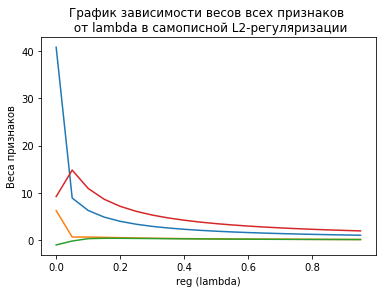

In [10]:
plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L2-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации L1
        #dReg = reg * W # градиент регуляризации L2
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-1.53020458  1.06451505 -0.68210913  2.73653717], error 3535.999482459323
Iter: 500, weights: [21.3235729   5.21869974 -7.83489698 20.31510711], error 43.05703683840704
Iter: 1000, weights: [26.59554557  6.06975903 -6.52953138 17.32747058], error 35.052037327892236
Iter: 1500, weights: [30.4284374   6.1831771  -5.06920279 15.13887888], error 30.690649895223846
Iter: 2000, weights: [33.30762444  6.21332059 -3.91653223 13.49305926], error 28.205668760392673
Iter: 2500, weights: [35.48049195  6.23026421 -3.04076023 12.25080124], error 26.78817070871898
Iter: 3000, weights: [37.1213768   6.24245025 -2.37878683 11.31266509], error 25.97950794929877
Iter: 3500, weights: [38.36063579  6.25158972 -1.87877455 10.60414671], error 25.51814897817559
Iter: 4000, weights: [39.29658326  6.25848557 -1.50113466 10.06903963], error 25.25491559553362
Iter: 4500, weights: [40.00345665  6.26369295 -1.2159218   9.66490052], error 25.104711266826424
Final MSE: 25.01899247765804


In [13]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

reg (lambda)=0.0
Iter: 0, weights: [3.74390832 0.36290658 0.38381699 2.18993573], error 3008.6221185474556
Iter: 500, weights: [24.3774371   5.25615027 -6.61958377 18.57160701], error 38.174613210715286
Iter: 1000, weights: [28.90633903  6.10915842 -5.62154643 16.00904674], error 32.27081259180594
Iter: 1500, weights: [32.17666779  6.21921077 -4.38899138 14.14211334], error 29.104072684498487
Iter: 2000, weights: [34.63083694  6.24630496 -3.40789187 12.7392909 ], error 27.29996847874947
Iter: 2500, weights: [36.48269507  6.26089238 -2.66165108 11.68056311], error 26.27092927763573
Iter: 3000, weights: [37.88113628  6.27129333 -2.09750102 10.88103874], error 25.683964184874174
Iter: 3500, weights: [38.93728973  6.27908402 -1.67136922 10.27720688], error 25.349158500551773
Iter: 4000, weights: [39.73494687  6.28496115 -1.34952744  9.82116421], error 25.158184882866728
Iter: 4500, weights: [40.3373766   6.28939914 -1.10645605  9.47673844], error 25.049253271590246
Final MSE: 24.9871185323

Final MSE: 311.0316692319297
reg (lambda)=0.4
Iter: 0, weights: [1.71758092 0.29552179 0.09305115 1.51501997], error 3436.521732039306
Iter: 500, weights: [ 0.67507721 -0.45203145 -0.25480458 24.02637603], error 356.4870435099871
Iter: 1000, weights: [ 0.57072737  0.12380026  0.11561257 24.03047705], error 327.0470023419358
Iter: 1500, weights: [ 0.45661802 -0.09020211 -0.30593947 24.02362363], error 334.4572625394001
Iter: 2000, weights: [ 3.62113361e-01 -3.65389715e-01  1.48117934e-02  2.40100306e+01], error 335.01670612245033
Iter: 2500, weights: [ 0.25308053  0.22788027 -0.39947661 24.01756681], error 341.8324608355
Iter: 3000, weights: [ 1.53689980e-01 -3.90419734e-03 -3.40803690e-02  2.40272933e+01], error 338.4929007370728
Iter: 3500, weights: [ 0.05912186 -0.25227766 -0.49201279 24.02971606], error 348.34234236191907
Iter: 4000, weights: [-0.04876237  0.34915309 -0.09932741 24.03885184], error 345.53998076938956
Iter: 4500, weights: [ 0.66082771  0.09719794  0.23970418 24.04413

Iter: 3500, weights: [-0.02684365  0.73991127 -0.24633634 18.15103484], error 701.7737072219713
Iter: 4000, weights: [-0.27968002  0.37337534 -0.16757683 18.21802842], error 710.6053535649523
Iter: 4500, weights: [ 1.03702678 -0.06197139 -0.15035153 18.18607478], error 728.6869466503088
Final MSE: 651.9873632510368
reg (lambda)=0.8500000000000001
Iter: 0, weights: [0.31527809 0.08981958 0.81589079 1.28676924], error 3325.690996863005
Iter: 500, weights: [ 0.79114142 -0.37174986  0.55414856 17.45557539], error 707.8931126667692
Iter: 1000, weights: [ 0.20584791 -0.08675824  0.48900094 17.43274456], error 742.1508926473664
Iter: 1500, weights: [ 1.33050871  0.29246655  0.51377067 17.48896445], error 774.3180085173252
Iter: 2000, weights: [ 0.68218855  0.66893177  0.53537093 17.41833333], error 719.3726272570917
Iter: 2500, weights: [ 0.13135633 -0.81282779  0.41064601 17.41361977], error 750.0574067513427
Iter: 3000, weights: [ 1.27644289 -0.40849232  0.41304307 17.48887552], error 773.6

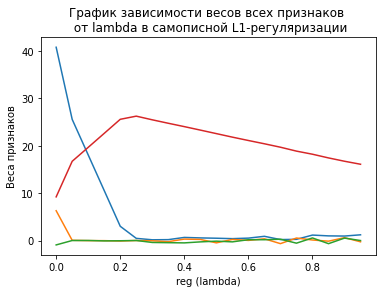

In [14]:
plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L1-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [15]:
# стандартизируем 2-й и 3-й признаки с изменением типа на float
X_st = X.copy().astype(np.float64)
X_norm = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
print(X_st)

# нормализуем стандартизированные 2-й и 3-й признаки
X_norm[:, 1] = normal_scale(X_st[:, 1])
X_norm[:, 2] = normal_scale(X_st[:, 2])
X_norm

[[ 1.         -0.70710678 -0.97958969  1.        ]
 [ 1.         -0.70710678 -0.56713087  1.        ]
 [ 1.         -0.35355339 -0.46401617  2.        ]
 [ 1.          0.70710678 -0.77336028  1.        ]
 [ 1.          0.          0.97958969  2.        ]
 [ 1.         -1.06066017 -0.36090146  1.        ]
 [ 1.          0.70710678  1.08270439  3.        ]
 [ 1.          2.47487373  2.11385144  3.        ]
 [ 1.         -0.70710678 -1.08270439  1.        ]
 [ 1.         -0.35355339  0.05155735  2.        ]]


array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

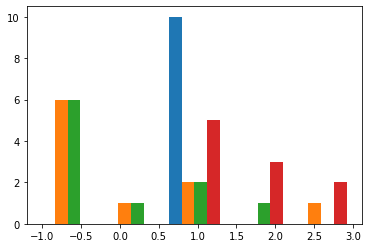

In [16]:
plt.hist(X_st, bins=5);

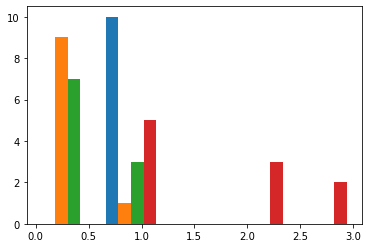

In [17]:
plt.hist(X_norm, bins=5);

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

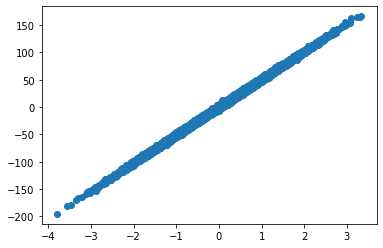

array(50.89074224)

In [18]:
# sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0,
#          effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y, coef = make_regression(n_samples=10000, n_features=1, noise=1.8, coef=True)
# plot regression dataset
pyplot.scatter(X, y)
pyplot.show()
coef

In [19]:
# градиентный спуск
def gradient_descent(X, y, iterations, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    #global err_list_gd
    err_list_gd = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        err_list_gd.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err_list_gd

In [20]:
W, err_list_gd = gradient_descent(X, y, iterations=50000, eta=1e-4)

Iter: 0, weights: [0.18338458], error 2582.054775687444
Iter: 5000, weights: [32.28547372], error 350.51661332896913
Iter: 10000, weights: [44.0661958], error 49.9909620934428
Iter: 15000, weights: [48.38944754], error 9.518579154184414
Iter: 20000, weights: [49.97598065], error 4.068083417639114
Iter: 25000, weights: [50.55820149], error 3.33405439299059
Iter: 30000, weights: [50.77186304], error 3.2352012546579214
Iter: 35000, weights: [50.85027187], error 3.2218885073004393
Iter: 40000, weights: [50.8790461], error 3.2200956533233724
Iter: 45000, weights: [50.88960557], error 3.2198542061377005
Final MSE: 3.2198216899683865


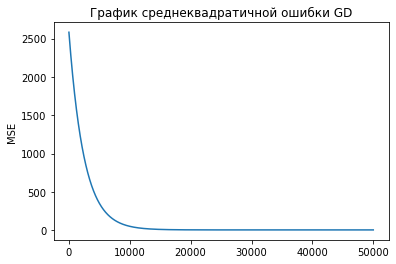

In [21]:
plt.plot(err_list_gd)
plt.title('График среднеквадратичной ошибки GD')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
#plt.xlim(0, 100)
plt.ylabel('MSE');

In [22]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    #global err_list_sgd
    err_list_sgd = []
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list_sgd.append(err)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err_list_sgd

In [23]:
W, err_list_sgd = stohastic_gradient_descent(X, y, iterations=50000, batch_size=100, eta=1e-2)

amount of batches is 100
Iter: 0, weights: [44.24500752], error 52.281558947462564
Iter: 5000, weights: [50.89902537], error 2.9107708424479104
Iter: 10000, weights: [50.89902537], error 2.9107708424479104
Iter: 15000, weights: [50.89902537], error 2.9107708424479104
Iter: 20000, weights: [50.89902537], error 2.9107708424479104
Iter: 25000, weights: [50.89902537], error 2.9107708424479104
Iter: 30000, weights: [50.89902537], error 2.9107708424479104
Iter: 35000, weights: [50.89902537], error 2.9107708424479104
Iter: 40000, weights: [50.89902537], error 2.9107708424479104
Iter: 45000, weights: [50.89902537], error 2.9107708424479104
Final MSE: 3.219827533545302


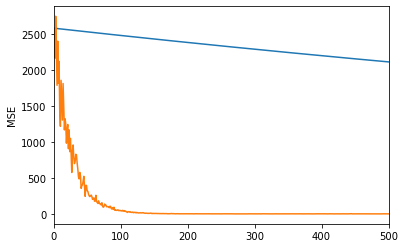

In [26]:
plt.plot(err_list_gd)
plt.plot(err_list_sgd)
#plt.title('График среднеквадратичной ошибки SGD')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
plt.xlim(0, 500)
plt.ylabel('MSE');

Выаод: скорость сходимости стохастического градиентного спуска значительно выше.

Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация